# Data Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from vega_datasets import data
seattle_weather = data.seattle_weather()
seattle_weather.head()

date  precipitation  temp_max  temp_min  wind  weather
0 2012-01-01            0.0      12.8       5.0   4.7  drizzle
1 2012-01-02           10.9      10.6       2.8   4.5     rain
2 2012-01-03            0.8      11.7       7.2   2.3     rain
3 2012-01-04           20.3      12.2       5.6   4.7     rain
4 2012-01-05            1.3       8.9       2.8   6.1     rain

## Customizing plots

In [3]:
print(plt.style.available)

['seaborn-ticks', 'classic', 'grayscale', 'seaborn-poster', 'fast', 'seaborn-talk', 'Solarize_Light2', 'ggplot', 'seaborn-paper', 'dark_background', 'bmh', 'seaborn-notebook', 'seaborn-darkgrid', 'seaborn-dark', 'seaborn-muted', 'fivethirtyeight', 'seaborn', 'seaborn-pastel', '_classic_test', 'seaborn-dark-palette', 'seaborn-white', 'seaborn-colorblind', 'seaborn-deep', 'seaborn-bright', 'tableau-colorblind10', 'seaborn-whitegrid']


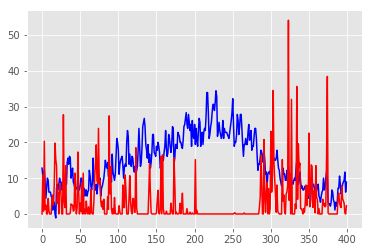

In [5]:
plt.plot(seattle_weather.temp_max[0:400], c='blue')
plt.plot(seattle_weather.precipitation[0:400], c='red')

plt.style.use('ggplot')

#plt.savefig('xlim.png')

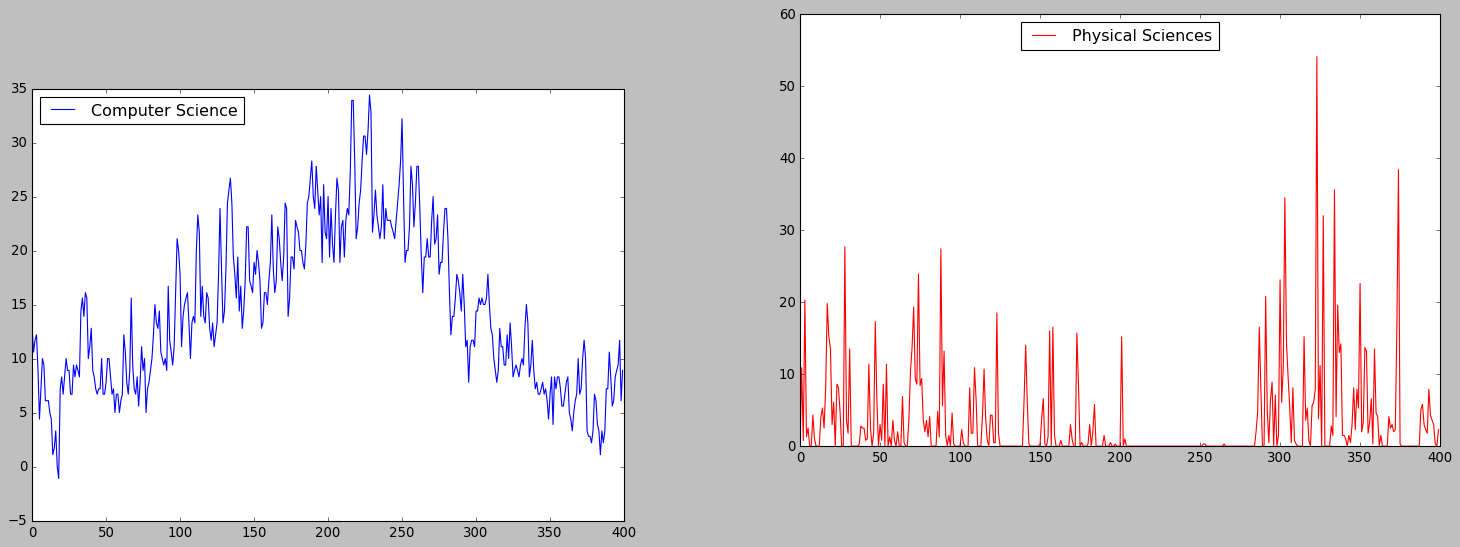

In [8]:
plt.axes([0.05, 0.05, 0.925, 0.9]) # [xlo, ylo, width, height] - lower corner xlo and ylo of 0.05 and 0.05, width of 0.425, and height of 0.9 (in units relative to the figure dimension).
plt.plot(seattle_weather.temp_max[0:400], c='blue', label='Computer Science')

plt.legend(loc=2)


plt.axes([1.25, .205, 1, 0.9])
plt.plot(seattle_weather.precipitation[0:400], c='red', label='Physical Sciences')

plt.legend(loc='upper center')

plt.style.use('classic')

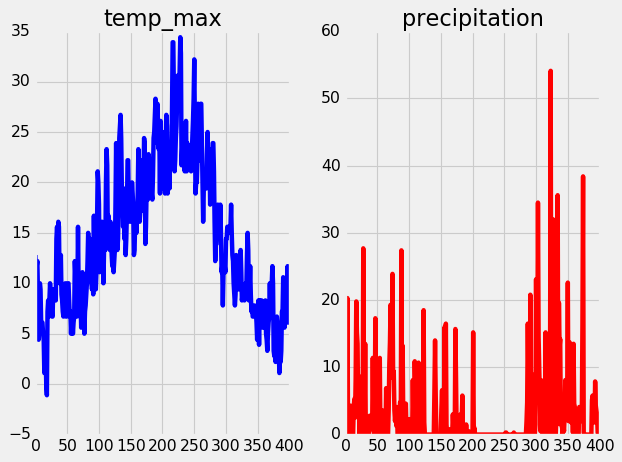

In [10]:
plt.subplot(1,2,1)  # plt.subplot(m, n, k) to make the subplot grid of dimensions m by n and to make the kth subplot active (subplots are numbered starting from 1 row-wise from the top left corner of the subplot grid).
plt.plot(seattle_weather.temp_max[0:400], c='blue')
plt.title('temp_max')

plt.subplot(1,2,2)
plt.plot(seattle_weather.precipitation[0:400], c='red')
plt.title('precipitation') 

plt.tight_layout() # to improve the spacing between subplots

plt.style.use('fivethirtyeight')


###  axis options

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 <a list of 7 Text xticklabel objects>)

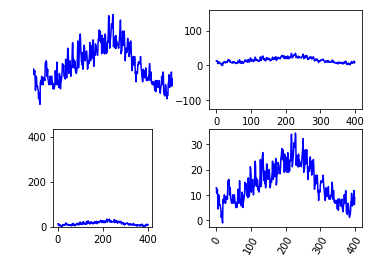

In [152]:
plt.subplot(2,2,1)
plt.plot(seattle_weather.temp_max[0:400], c='blue')
plt.axis('off')

plt.subplot(2,2,2)
plt.plot(seattle_weather.temp_max[0:400], c='blue')
plt.axis('equal')


plt.subplot(2,2,3)
plt.plot(seattle_weather.temp_max[0:400], c='blue')
plt.axis('square')

plt.subplot(2,2,4)
plt.plot(seattle_weather.temp_max[0:400], c='blue')
plt.axis('tight')

plt.style.use('classic')

###   scaling

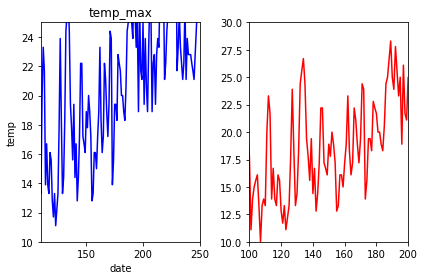

In [3]:
plt.subplot(1,2,1)  # plt.subplot(m, n, k) to make the subplot grid of dimensions m by n and to make the kth subplot active (subplots are numbered starting from 1 row-wise from the top left corner of the subplot grid).
plt.plot(seattle_weather.temp_max[0:400], c='blue')
plt.title('temp_max')
plt.xlabel('date')
plt.ylabel('temp')
plt.axis((110, 250, 10, 25))


plt.subplot(1,2,2)
plt.plot(seattle_weather.temp_max[0:400], c='red')
plt.xlim(100, 200)
plt.ylim(10, 30)

plt.tight_layout() # to improve the spacing between subplots

### annotate()

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text xticklabel objects>)

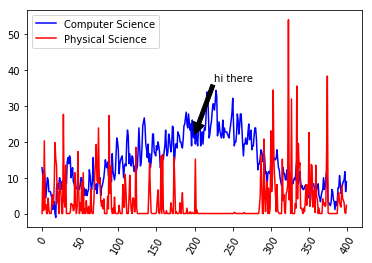

In [153]:
plt.plot(seattle_weather.temp_max[0:400], c='blue', label='Computer Science')
plt.plot(seattle_weather.precipitation[0:400], c='red', label='Physical Science')
plt.legend(loc='upper left')
plt.annotate('hi there', xy=(200, 22), xytext=(200+25, 22+15), arrowprops=dict(facecolor='black'))

plt.xticks(rotation=60)

### smooothing

In [211]:
seattle_weather['temp_mean']=(seattle_weather.temp_max+seattle_weather.temp_min)/2

smooooth1 = seattle_weather.iloc[:,[1,2,3,4,7]].rolling(window=30).std()
smooooth2 = seattle_weather.temp_mean.rolling(window=250).std()
smooooth3 = seattle_weather.temp_mean.rolling(window=500).mean()
smooooth4 = seattle_weather.temp_mean.rolling(window=60).mean()

smooooth1.tail()

precipitation  temp_max  temp_min      wind  temp_mean
1456      11.735027  3.266389  3.233759  1.929219   3.098517
1457      11.696507  3.317701  3.026959  1.912515   3.058514
1458      11.696507  3.084772  2.880870  1.833168   2.853657
1459      11.710122  3.084772  2.658582  1.774950   2.774312
1460      11.823812  3.114143  2.884284  1.774950   2.889032

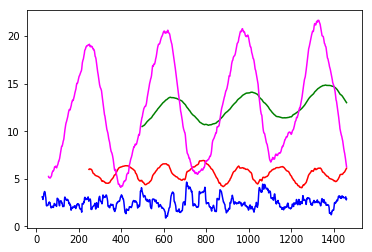

In [209]:
plt.plot(smooooth1.temp_mean, c='blue')
plt.plot(smooooth2, c='red')
plt.plot(smooooth3, c='green')
plt.plot(smooooth4, c='magenta')

## Plotting 2D arrays

(0.0, 45.0, 0.0, 45.0)

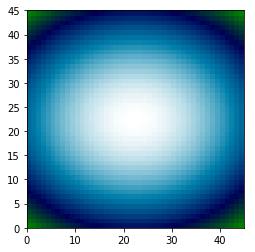

In [22]:
X,Y = np.meshgrid(np.linspace(-2, 2, 45), np.linspace(-1, 1, 45))

Z = X**2/25 + Y**2/4

plt.set_cmap('ocean_r')
plt.pcolor(Z)
plt.axis('square')

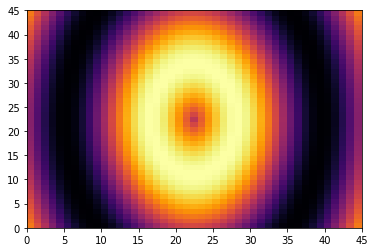

In [23]:
X,Y = np.meshgrid(np.linspace(-2, 2, 45), np.linspace(-1, 1, 45))
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 
plt.set_cmap('inferno')
plt.pcolor(Z)


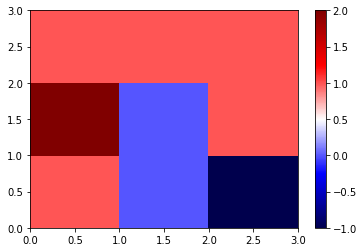

In [24]:
A = np.array([[1, 0, -1], [2, 0, 1], [1, 1, 1]])
plt.pcolor(A, cmap='seismic')
plt.colorbar()

Possible colormap values are: ```Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r```

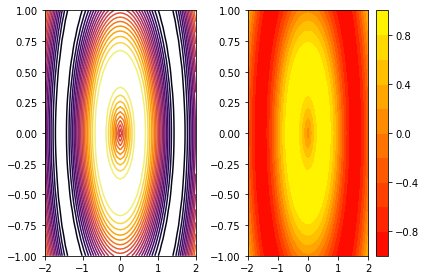

In [25]:
plt.subplot(1,2,1)
plt.contour(X, Y, Z, 20)

plt.subplot(1,2,2)
plt.contourf(X,Y,Z,10, cmap='autumn')
plt.colorbar()

plt.tight_layout()

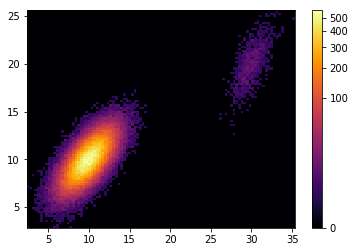

In [26]:
import matplotlib.colors as mcolors
from numpy.random import multivariate_normal

data = np.vstack([
    multivariate_normal([10, 10], [[3, 2], [2, 3]], size=100000),
    multivariate_normal([30, 20], [[2, 3], [1, 3]], size=1000)
])

plt.hist2d(data[:, 0], data[:, 1], bins=100, norm=mcolors.PowerNorm(0.3))
plt.colorbar()
plt.show()

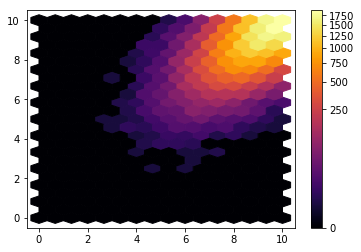

In [102]:
plt.hexbin(data[:, 0], data[:, 1], gridsize=(15,12), extent=(0, 10,0, 10),  norm=mcolors.PowerNorm(0.3))
plt.colorbar()
plt.show()

### Images

In [28]:
img = plt.imread('93j5jsC7EyQ.jpg')
img.shape

(343, 463, 3)

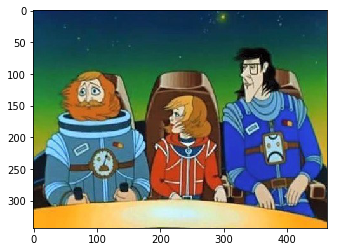

In [104]:
plt.imshow(img)

In [105]:
collapse = img.mean(axis=2)
collapse.shape

(343, 463)

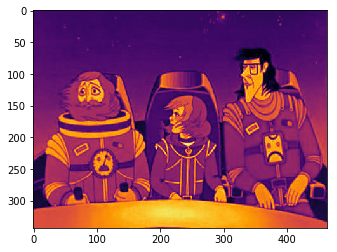

In [106]:
plt.imshow(collapse)

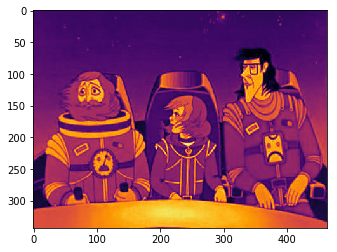

In [107]:
plt.imshow(img.sum(axis=2))

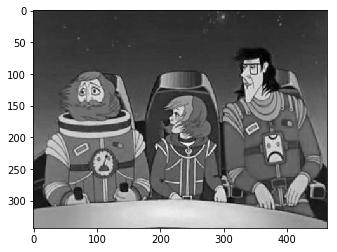

In [108]:
plt.imshow(collapse, cmap='gray')

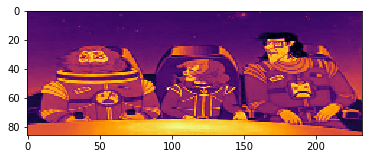

In [109]:
plt.imshow(collapse[::4,::2])

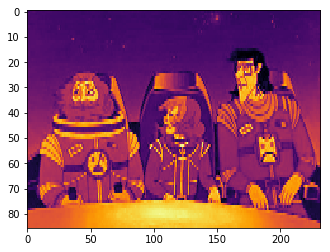

In [110]:
plt.imshow(collapse[::4,::2], aspect=2.0)

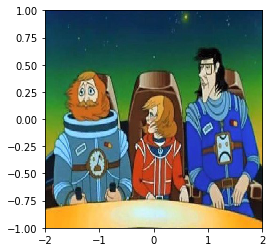

In [112]:
plt.imshow(img, extent=(-2,2,-1,1), aspect=2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


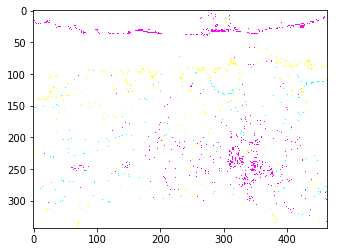

In [30]:
pmin, pmax = img.min()+55, img.max()-55
rescaled_image = 256*(img - pmin) / (pmax - pmin)
plt.imshow(rescaled_image)

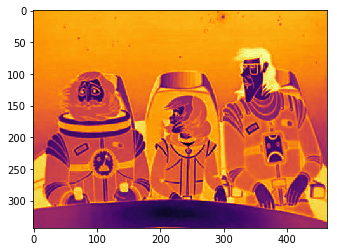

In [116]:
pmin, pmax = collapse.min()+155, collapse.max()-155
rescaled_image = 256*(collapse - pmin) / (pmax - pmin)
plt.imshow(rescaled_image)

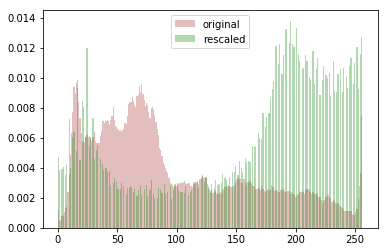

In [233]:
plt.hist(img.flatten(), bins=256, range=(0,256), density=True, color='brown', alpha=0.3)
plt.hist(rescaled_image.flatten(), bins=256, range=(0,256), density=True, color='green', alpha=0.3)
plt.legend(['original', 'rescaled'])
plt.show()

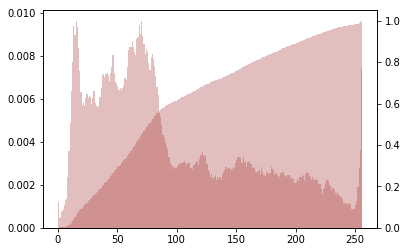

In [236]:
plt.hist(img.flatten(), bins=256, range=(0,256), density=True, color='brown', alpha=0.3)
plt.twinx() # Use plt.twinx() to overlay the CDF in the bottom subplot
plt.hist(img.flatten(), bins=256, range=(0,256), cumulative = True, density=True, color='brown', alpha=0.3)
plt.show()

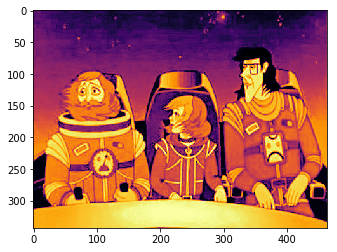

In [246]:
orig_cdf, bins, patches = plt.hist(collapse.flatten(), bins=256, range=(0,256), cumulative = True, density=True, color='brown', alpha=0.3)
new_pixels = np.interp(collapse.flatten(), bins[:-1], orig_cdf*255)
new = new_pixels.reshape(collapse.shape)
plt.imshow(new)

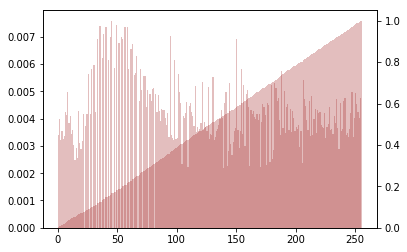

In [247]:
plt.hist(new.flatten(), bins=256, range=(0,256), density=True, color='brown', alpha=0.3)
plt.twinx() 
plt.hist(new.flatten(), bins=256, range=(0,256), cumulative = True, density=True, color='brown', alpha=0.3)
plt.show()

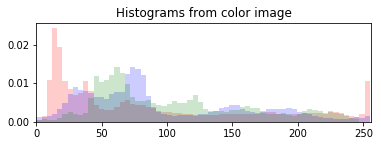

In [251]:
red, green, blue = img[:,:,0], img[:,:,1], img[:,:,2]
red_pixels, green_pixels, blue_pixels = red.flatten(), green.flatten(),  blue.flatten()

plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
plt.hist(red_pixels, bins=64, density=True, color='red', alpha=0.2)
plt.hist(blue_pixels, bins=64, density=True, color='blue', alpha=0.2)
plt.hist(green_pixels, bins=64, density=True, color='green', alpha=0.2)

plt.show()

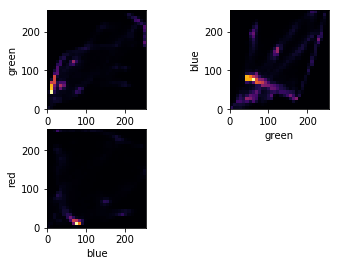

In [257]:
# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.xlabel('red')
plt.ylabel('green')
plt.axis('square')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.xlabel('green')
plt.ylabel('blue')
plt.axis('square')
plt.hist2d(green_pixels, blue_pixels, bins=(32, 32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.xlabel('blue')
plt.ylabel('red')
plt.axis('square')
plt.hist2d(blue_pixels, red_pixels, bins=(32, 32))


# Display the plot
plt.show()

# Seaborn

In [290]:
sns.palettes.SEABORN_PALETTES

{'deep': ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD'],
 'muted': ['#4878CF', '#6ACC65', '#D65F5F', '#B47CC7', '#C4AD66', '#77BEDB'],
 'pastel': ['#92C6FF', '#97F0AA', '#FF9F9A', '#D0BBFF', '#FFFEA3', '#B0E0E6'],
 'bright': ['#003FFF', '#03ED3A', '#E8000B', '#8A2BE2', '#FFC400', '#00D7FF'],
 'dark': ['#001C7F', '#017517', '#8C0900', '#7600A1', '#B8860B', '#006374'],
 'colorblind': ['#0072B2',
  '#009E73',
  '#D55E00',
  '#CC79A7',
  '#F0E442',
  '#56B4E9']}

Circular colors = when the data is not ordered

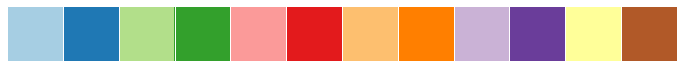

In [294]:
sns.palplot(sns.color_palette("Paired", 12))

Sequential colors = when the data has a consistent range from high to low

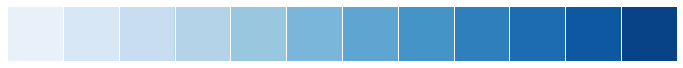

In [297]:
sns.palplot(sns.color_palette("Blues", 12))

Diverging colors = when both the low and high values are interesting


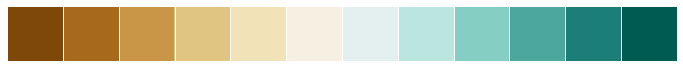

In [298]:
sns.palplot(sns.color_palette("BrBG", 12))

In [291]:
sns.set(color_codes=True)
sns.set_palette('pastel')

In [3]:
tips = sns.load_dataset('tips')

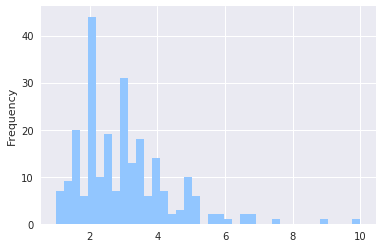

In [292]:
tips['tip'].plot.hist(bins=38)

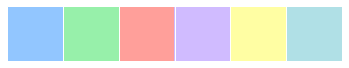

In [293]:
sns.palplot(sns.color_palette())

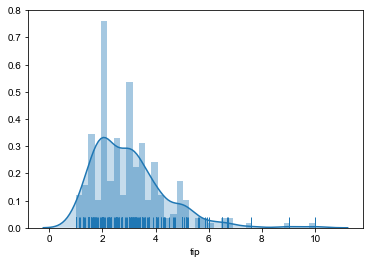

In [31]:
sns.distplot(tips['tip'], bins=38, hist=True,kde=True, rug=True, kde_kws=dict(shade=True))
sns.set_style('darkgrid')

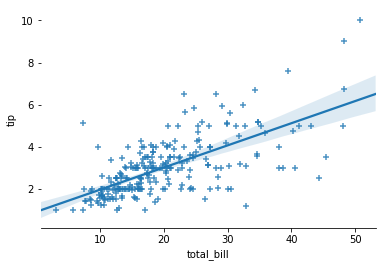

In [13]:
sns.regplot(x='total_bill', y='tip', data=tips, marker='+')
sns.set_style('white')
sns.despine(left=True)


## Statistical plots with Seaborn

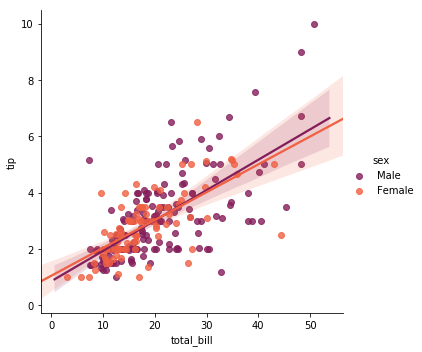

In [4]:
sns.lmplot(x='total_bill', y='tip', hue='sex', palette='rocket', data=tips)

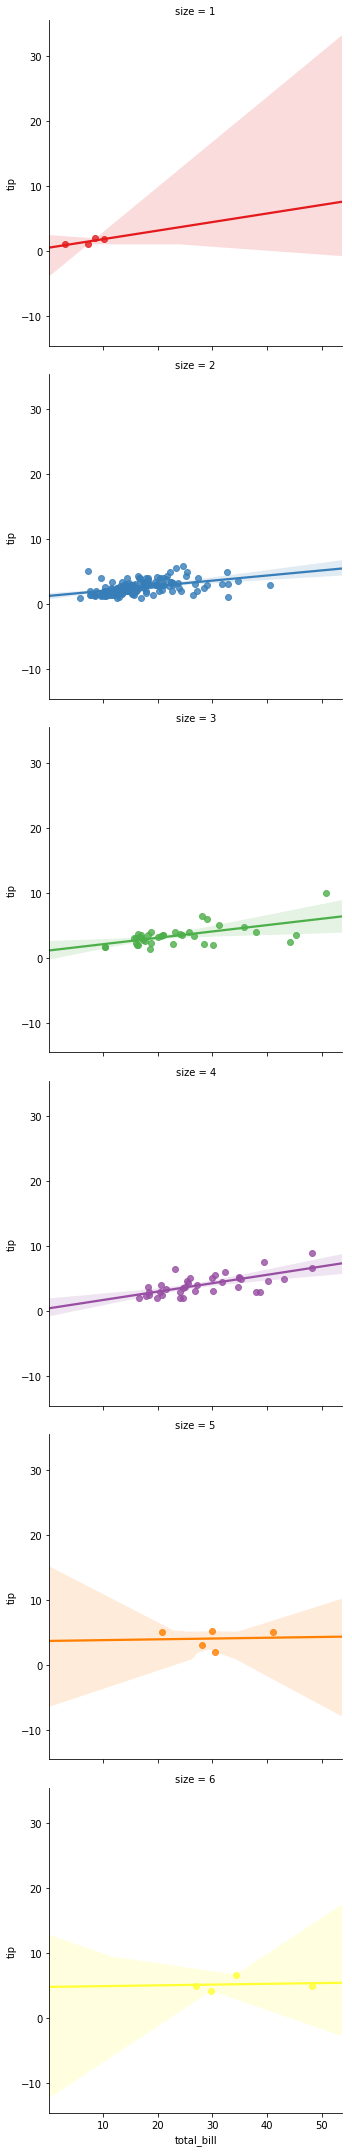

In [118]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='size', row='size', palette='Set1')

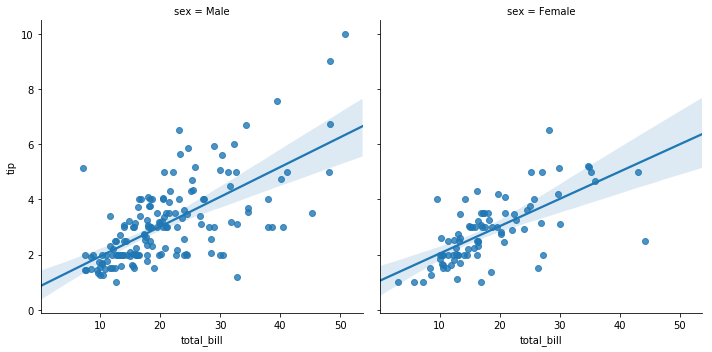

In [119]:
sns.lmplot(x='total_bill', y='tip', col='sex', data=tips)

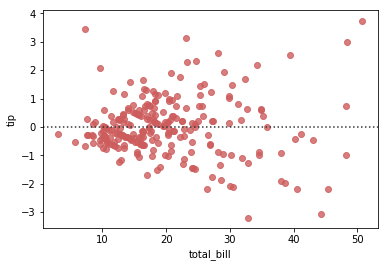

In [120]:
sns.residplot(x='total_bill', y='tip', color='indianred', data=tips)

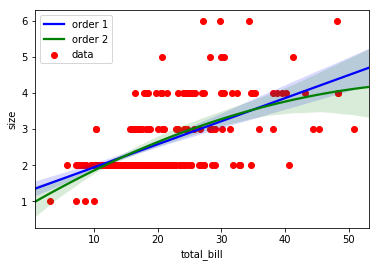

In [26]:
plt.scatter(tips['total_bill'], tips['size'], label='data', color='red', marker='o')
sns.regplot(x='total_bill', y='size', data=tips,  scatter=None, color='blue', label='order 1')
sns.regplot(x='total_bill', y='size', data=tips, scatter=None, order=2, color='green', label='order 2')

plt.legend(loc='upper left')
plt.show()

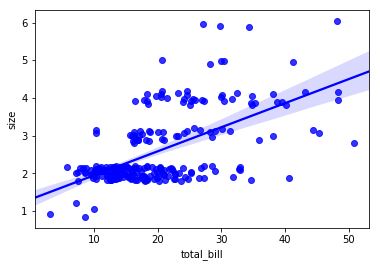

In [33]:
sns.regplot(x='total_bill', y='size', data=tips,   y_jitter=.2, color='blue', label='order 1')

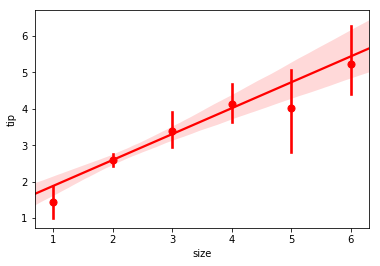

In [39]:
sns.regplot(x='size', y='tip', data=tips, x_estimator=np.mean, color='red', label='order 1')

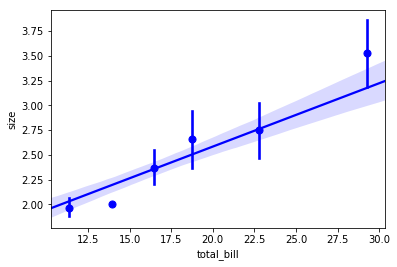

In [38]:
sns.regplot(x='total_bill', y='size', data=tips,   x_bins=6, color='blue')

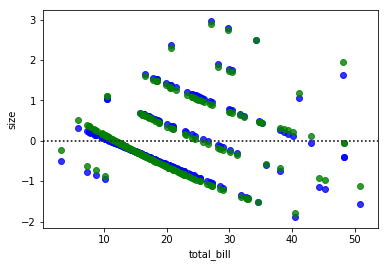

In [22]:
sns.residplot(x='total_bill', y='size', color='blue', data=tips)
sns.residplot(x='total_bill', y='size', color='green', data=tips, order=2)

### Visualizing distributions

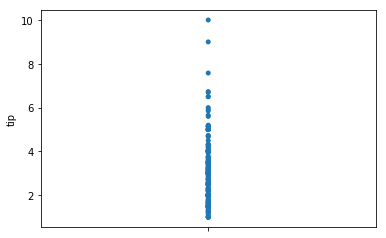

In [122]:
sns.stripplot(y='tip', data=tips)

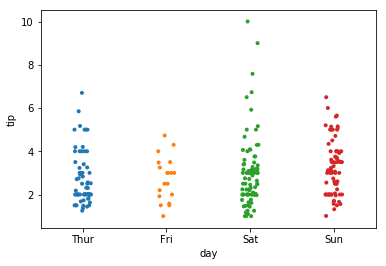

In [123]:
sns.stripplot(x='day', y='tip', data=tips, size=4, jitter=True)

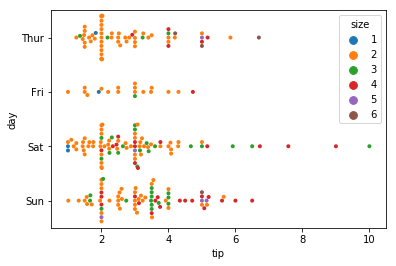

In [6]:
sns.swarmplot(x='tip', y='day', data=tips, size=4, hue='size', orient='h')

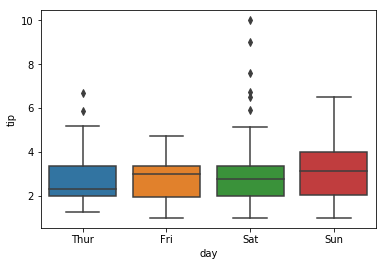

In [125]:
sns.boxplot(x='day', y='tip', data=tips)

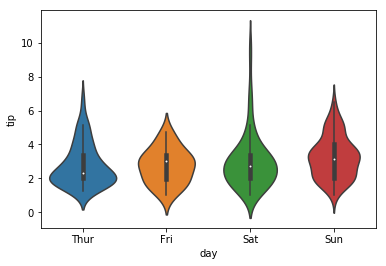

In [126]:
sns.violinplot(x='day', y='tip', data=tips)

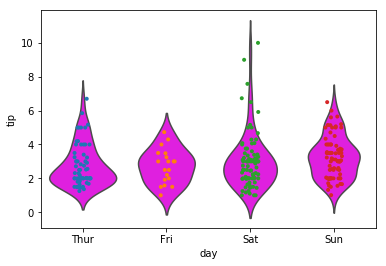

In [127]:
sns.violinplot(x='day', y='tip', data=tips, inner=None, color='magenta')
sns.stripplot(x='day', y='tip', data=tips, size=4, jitter=True)

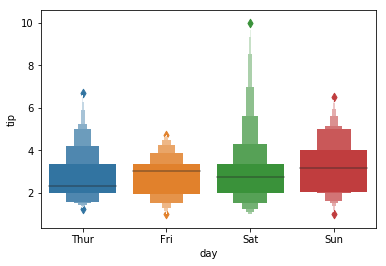

In [9]:
sns.boxenplot(x='day', y='tip', data=tips) #lvplot

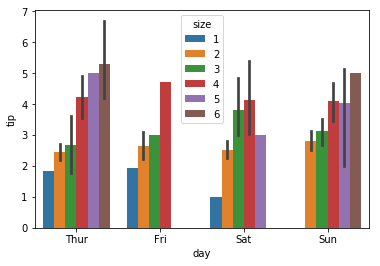

In [5]:
sns.barplot(x='day', y='tip', data=tips, hue='size')

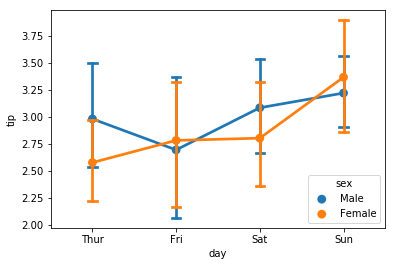

In [12]:
sns.pointplot(x='day', y='tip', data=tips, hue='sex', capsize=.1)

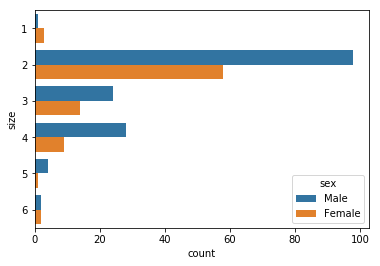

In [17]:
sns.countplot(y='size', data=tips, hue='sex')

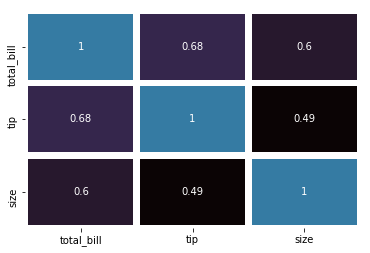

In [52]:
sns.heatmap(tips.corr(), annot=True, cmap="mako", cbar=False, linewidths=5.75, center=tips.corr().iloc[1, 1])

In [56]:
pd_crosstab = pd.crosstab(tips["size"], tips["sex"])
pd_crosstab

sex   Male  Female
size              
1        1       3
2       98      58
3       24      14
4       28       9
5        4       1
6        2       2

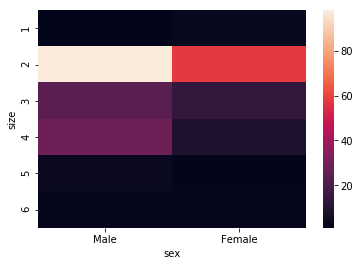

In [57]:
sns.heatmap(pd_crosstab)

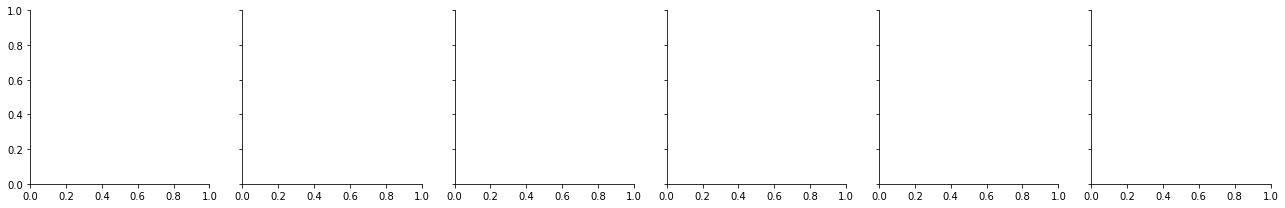

In [62]:
sns.FacetGrid(tips, col="size")

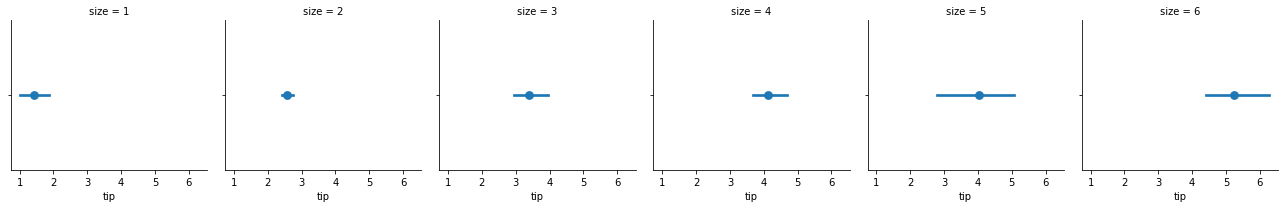

In [73]:
sns.FacetGrid(tips, col="size").map(sns.pointplot, 'tip')

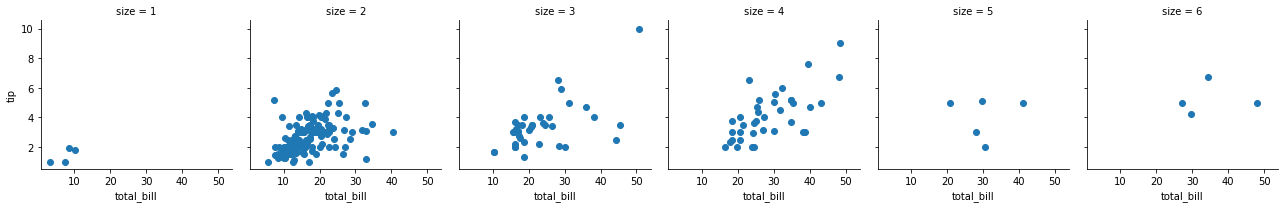

In [69]:
sns.FacetGrid(tips, col="size").map(plt.scatter, 'total_bill','tip')

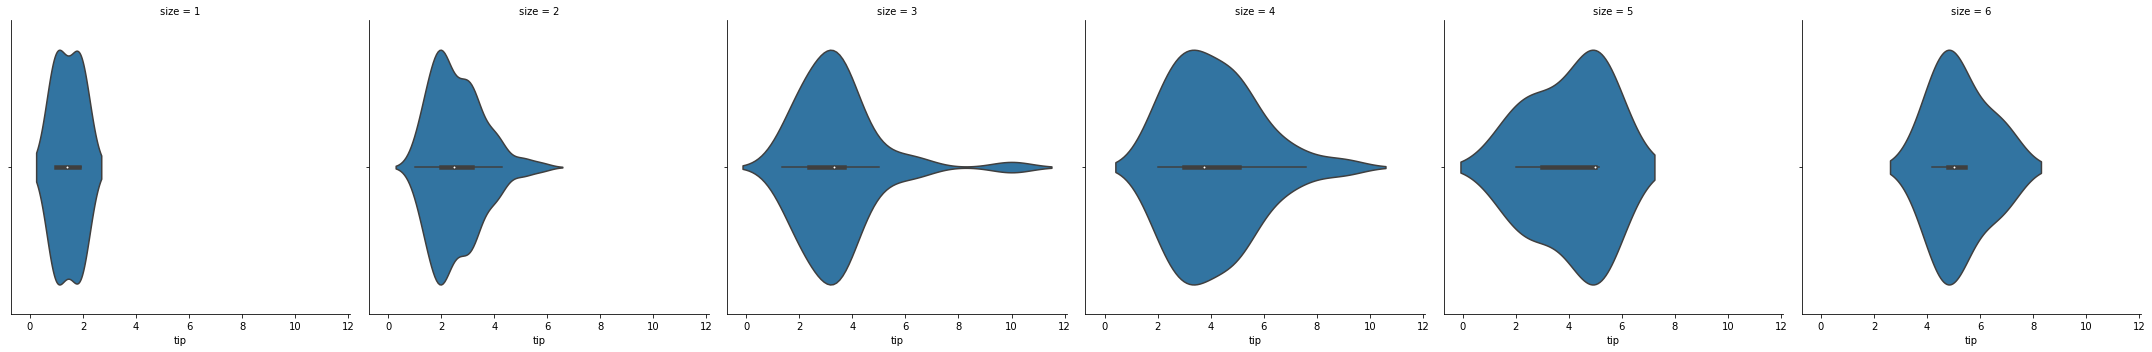

In [67]:
sns.factorplot(x="tip", data=tips, col="size", kind='violin')

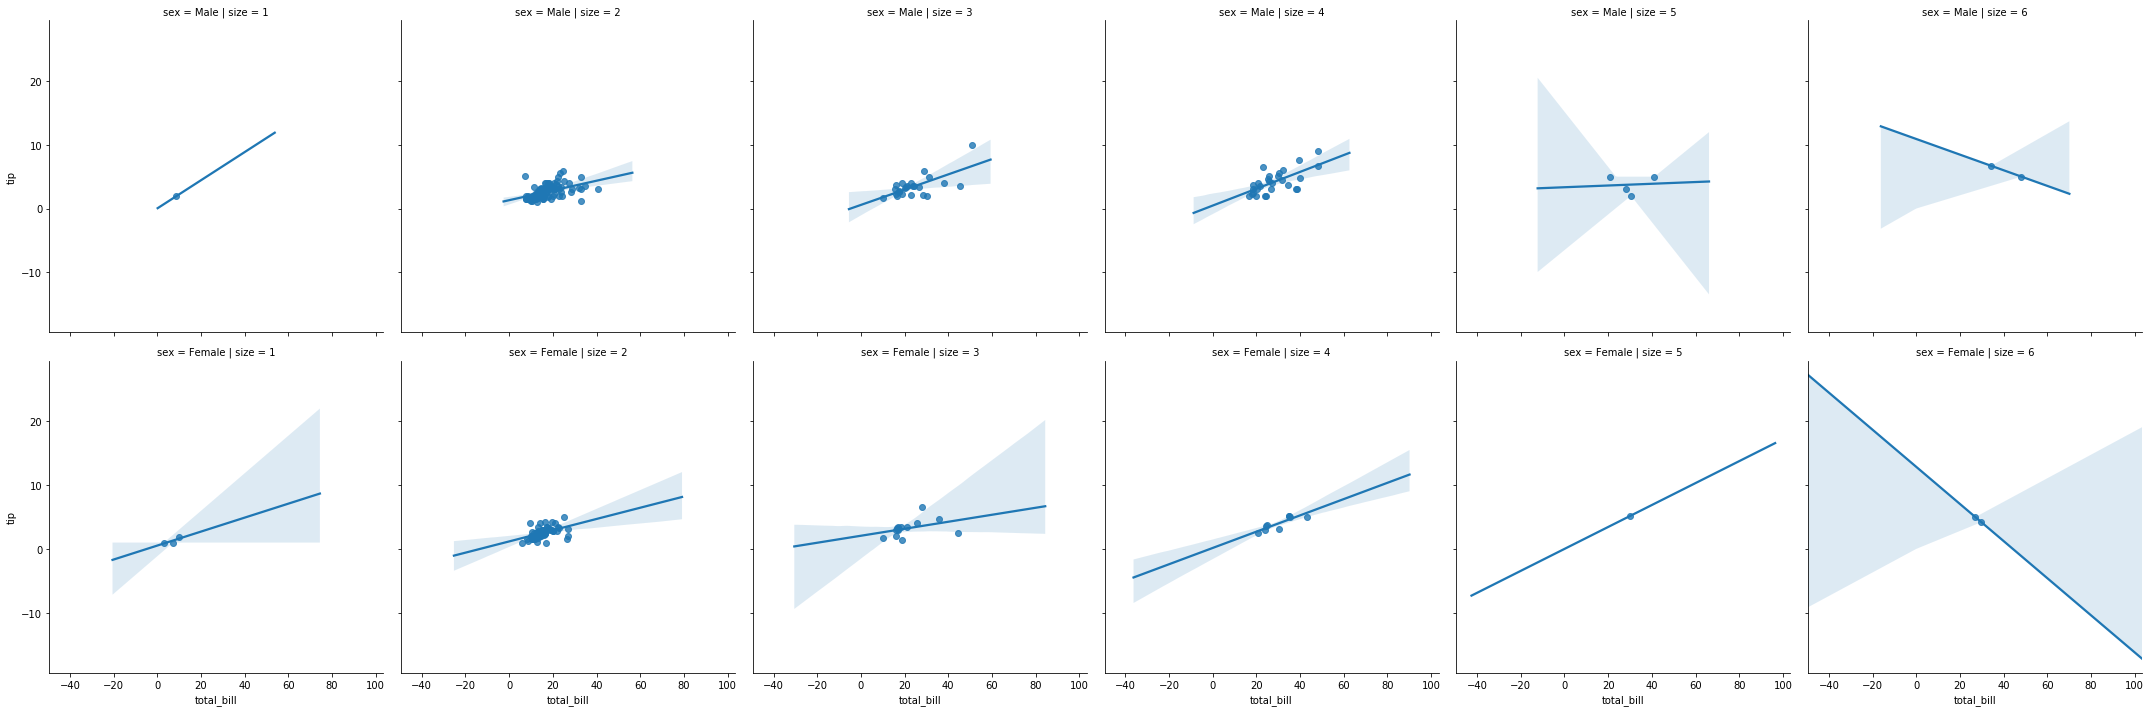

In [72]:
sns.lmplot(data=tips, x="total_bill", y="tip",
           col="size", row='sex', fit_reg=True)

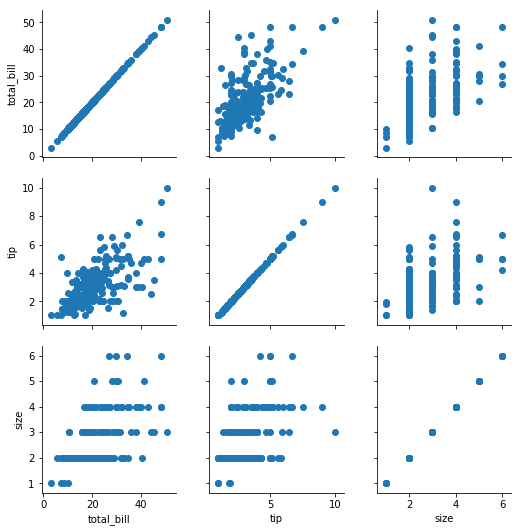

In [74]:
sns.PairGrid(tips).map(plt.scatter)

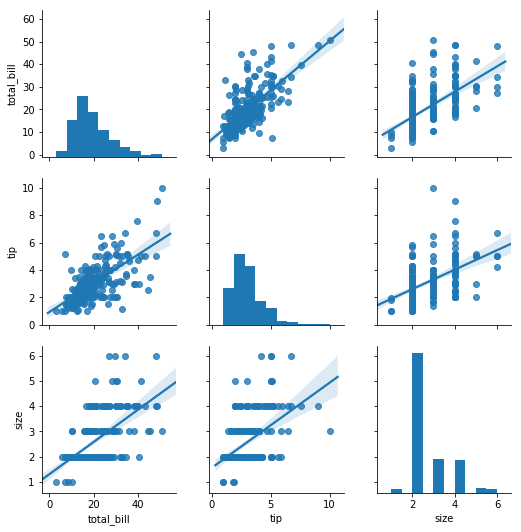

In [84]:
g = sns.PairGrid(tips)
g = g.map_diag(plt.hist)
g = g.map_offdiag(sns.regplot)

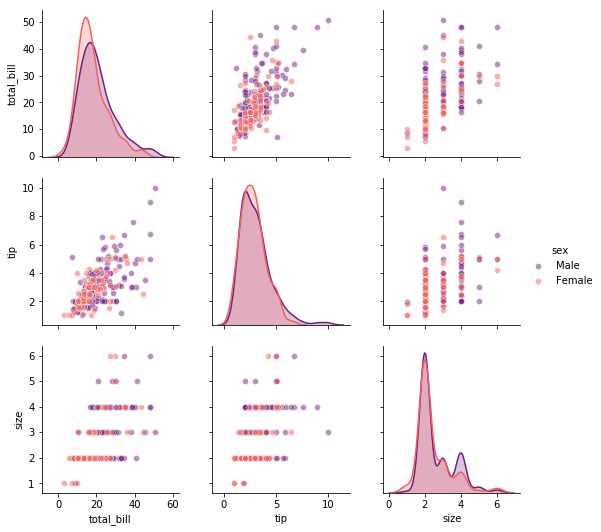

In [85]:
sns.pairplot(tips, hue='sex', kind='scatter', diag_kind='kde', palette='magma', plot_kws={'alpha': 0.5})

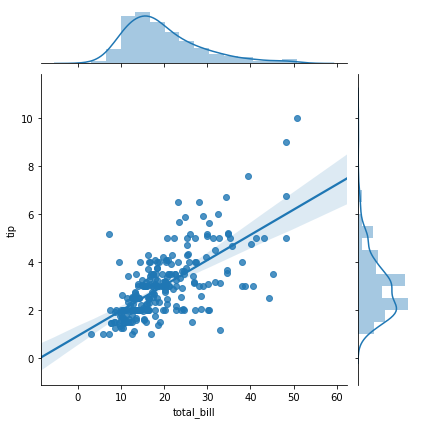

In [87]:
sns.JointGrid(x='total_bill', y='tip', data=tips).plot(sns.regplot, sns.distplot)

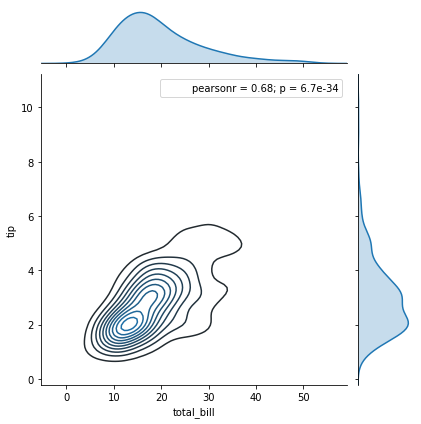

In [93]:
g = sns.JointGrid(x='total_bill', y='tip', data=tips) 
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)
g = g.annotate(stats.pearsonr)

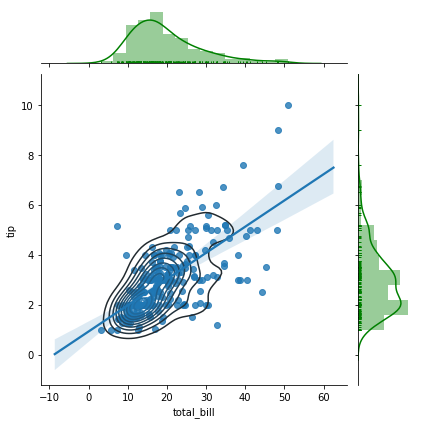

In [94]:
sns.jointplot(x='total_bill', y='tip', data=tips,  kind='reg', marginal_kws=dict(bins=15, rug=True, color='green')).plot_joint(sns.kdeplot)

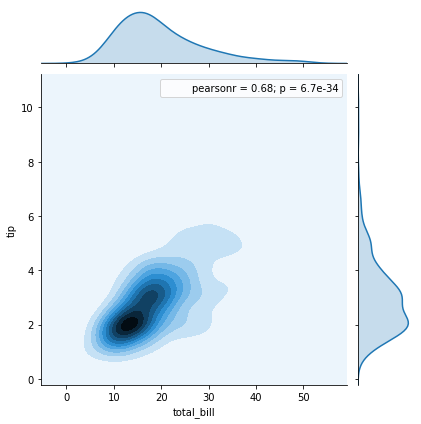

In [131]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

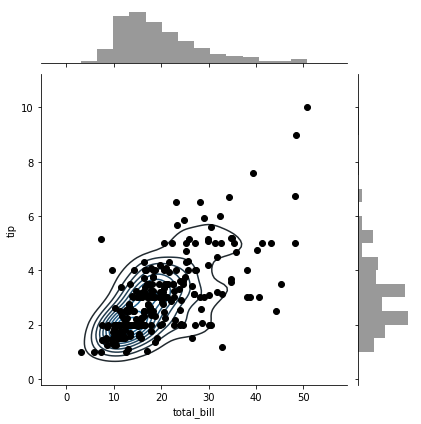

In [8]:
sns.jointplot(x='total_bill', y='tip', data=tips, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=12)